### Computational Guided Inquiry for Modeling Earth's Climate (Neshyba & Posta, 2025)

# CumulativeAnalysis

## Introduction
Here, we're going to focus on the accumulated sum of emissions over time, written mathematically as

$$
E(t) = \int_{-\infty}^t \epsilon(t) \ dt \ \ \ \ \ (1)
$$

where $\epsilon(t)$ is the annual emission rate we created in ScheduledFlows.

Why would we care about this accumulation? There's a school of thought in climate science, that what really counts is not so much how much carbon goes into the air any given year, but total amount humans put there.

There's an easy way to do this integration in Python. The key is a numpy function called "np.cumsum," which adds up the emissions year after year. To convert the result of np.cumsum into a total accumulated emission in GtC, we need to multiply it by the time interval between steps in the array we're using to represent the emissions. Details are given in the code below.

## Goals

- I can use pandas and dictionaries to read data with metadata.
- I can use np.cumsum to numerically integrate a function.
- I am familiar with quantitative features of cumulative anthropogenic carbon emissions.

In [2]:
import numpy as np
import matplotlib.pyplot as plt; plt.rc("figure", figsize=(12,8))
import meclib.cl as cl

### Load your scenario
To get the file you generated in *ScheduledFlows* into your current work space, _download_ it to your laptop or desktop, then _upload_ it to the current folder. 

Once you've done that, in the cell below, first you should assign a filename to your *ScheduledFlows* file, something like this (but using your filename, of course):

    filename = 'Peaks_in_2040.pkl'

Then, use cl.LoadMyScenario to load the scenario into Python as a dictionary named epsdictionary_fromfile. Something like this should work:

    time, eps, epsdictionary_fromfile = cl.LoadMyScenario(filename, verbose=True)

{'dataframe':             time     emissions
0    1750.000000  1.349872e-01
1    1750.667780  1.364919e-01
2    1751.335559  1.380133e-01
3    1752.003339  1.395517e-01
4    1752.671119  1.411073e-01
..           ...           ...
595  2147.328881  5.194863e-07
596  2147.996661  4.596060e-07
597  2148.664441  4.066280e-07
598  2149.332220  3.597567e-07
599  2150.000000  3.182882e-07

[600 rows x 2 columns], 'emission units': 'GtC/year', 'k': 0.0166, 't_0': 2003, 'eps_0': 9, 't_peak': 2040, 't_decarb': 15}


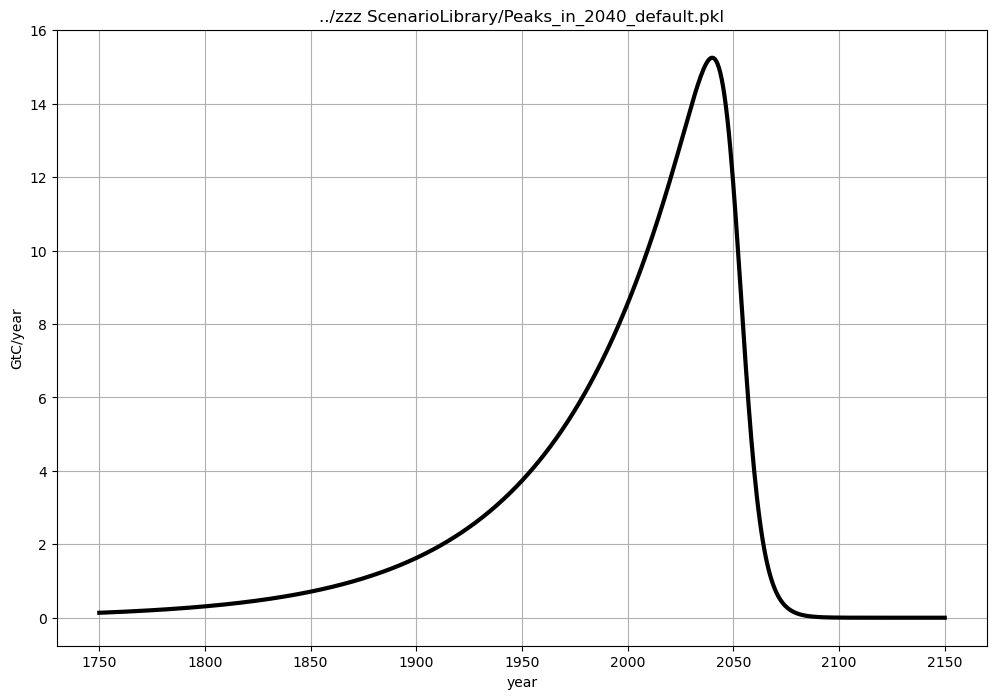

In [4]:
# Assign a name to your file
### BEGIN SOLUTION
filename = '../zzz ScenarioLibrary/Peaks_in_2040_default.pkl'
### END SOLUTION

# Load the stored dictionary
### BEGIN SOLUTION
time, eps, epsdictionary_fromfile = cl.LoadMyScenario(filename, verbose=True)
### END SOLUTION

### Calculating the accumulated anthropogenic carbon emission
The code below attempts to carry out the integration indicated in Eq. 1 numerically. It's *almost* correct. Execute the cell, then read on to see what the error is.

Text(0.5, 1.0, '(Improperly) integrated anthropogenic carbon')

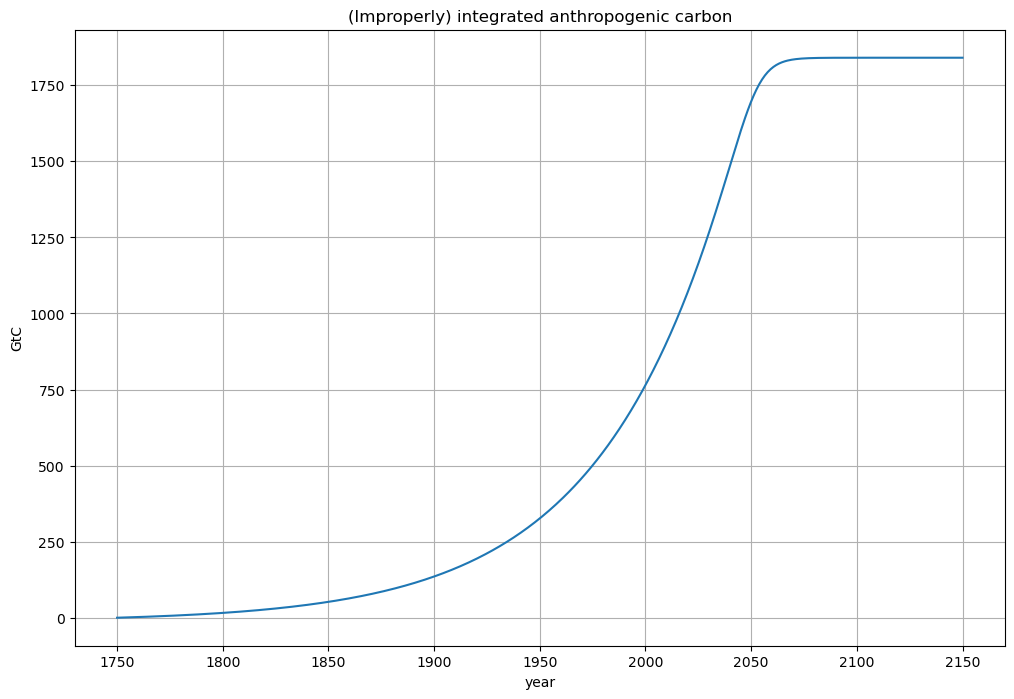

In [6]:
# This specifies beginning accumulated amount of 
# anthropogenic carbon in the atmosphere
E = 0

# Initialize an empty numpy array that will hold new values over time
E_array = np.empty(0)

# Loop over all the times
for i in range(len(time)):
    E += eps[i]
    E_array = np.append(E_array,E)

# Graph it
plt.figure()
plt.plot(time,E_array)
plt.grid()
plt.xlabel('year')
plt.ylabel('GtC')
plt.title('(Improperly) integrated anthropogenic carbon')

### Your turn 
OK, what's the error in the above code? There's nothing in the loop that takes into account the length of each time step! (Like, is it a year? Half a year? What?) 

To fix that, we need to figure out what that time step is. An easy way to do that is to say 

    dt = t[1]-t[0])
    print('dt =', dt)
    
Then, in each pass through the loop, multiply the emission rate by that time interval, something along the lines of

    E += eps[i]*dt

In the cell below, make this correction, then graph your result.

dt = 0.6677796327212491


Text(0.5, 1.0, 'Integrated anthropogenic carbon')

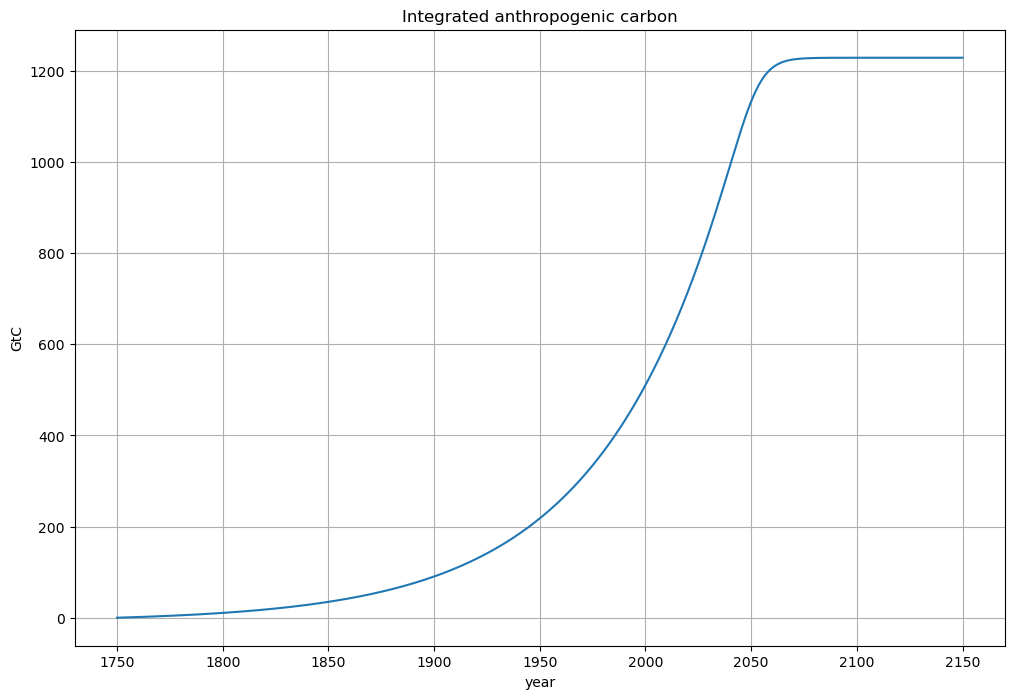

In [8]:
### BEGIN SOLUTION

dt = time[1]-time[0]
print('dt =', dt)

# This specifies beginning accumulated amount of anthropogenic carbon 
# in the atmosphere
E = 0

# Initialize an empty numpy array that will hold new values over time
E_array = np.empty(0)

# Loop over all the times
for i in range(len(time)):
    E += eps[i]*dt
    E_array = np.append(E_array,E)

# Graph it
plt.figure()
plt.plot(time,E_array)
plt.grid()
plt.xlabel('year')
plt.ylabel('GtC')
plt.title('Integrated anthropogenic carbon')

### END SOLUTION

### Pause for analysis
It is thought that known reserves of fossil carbon (mostly in the form of coal) tally up to around 4000 GtC (see https://www.nature.com/articles/nature14016). Hopefully, your cumulative total is less than that amount (otherwise, we have an unrealistic scenario!). In the cell below, calculate the percentage of known reserves of fossil carbon does your schedule *leaves in the ground*.

Some hints on how to do this: 
- The last value of the accumulated emission array you just calculated can be accessed by E_array[-1].
- The fraction of known reserves used by that time must be that number divided by 4000.
- The fraction of known reserves remaining by that time must be 1 minus that number; multiplying that by 100 will give us what we're looking for, namely, the percent of known reserves remaining in the ground by the time humans stop mining fossil fuels and burning them.

In [10]:
### BEGIN SOLUTION
remaining = (1-E_array[-1]/4000)*100
print(remaining)
### END SOLUTION

69.2747359338795


### Validating and finishing up
Assuming all this has gone smoothly, don't forget to do a Kernel/Restart & Run All, run the whole notebook, and make sure there aren't any errors.